In [241]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#=================================
df = pd.read_excel("un_us.xlsx")
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')
d = df["UN_US"].diff()
df.insert(2, "diff_UN_US", d, True)
df = df[["DATE","UN_US","diff_UN_US"]]
df.head()

,DATE,UN_US,diff_UN_US
0,1948-01-01,3.4,NaN
1,1948-02-01,3.8,0.4
2,1948-03-01,4.0,0.2
3,1948-04-01,3.9,-0.1
4,1948-05-01,3.5,-0.4


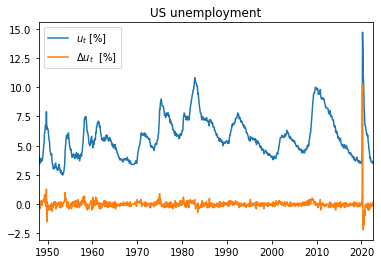

In [407]:
x = df[["DATE"]]
y = df[["UN_US"]]
d = df[["diff_UN_US"]]
a = (x.iloc(0))[0]
#============================================
fig, ax = plt.subplots()
ax.plot(x,y, label = "$u_t$ [%]")
ax.plot(x,d, label = "$Δu_t$  [%]" )
ax.legend()
ax.set_title("US unemployment")
ax.set_xlim(a,b)
plt.savefig("un.jpg")
#===========================================

In [394]:
from numpy import linalg as lin

def I(X):
    return lin.inv(X)

x = d.to_numpy()
x = np.transpose(x)

l = (np.shape(x))[1]
k = 1
X = np.zeros([k,l])
for i in range(k):
    X[i,:] =np.roll (x,-(i+1))

y = (x[:,1:l-k]).T
X = (X[:,1:l-k]).T
#========================== ols custom factions
def ac(x,k):
    l = (np.shape(x))[1]
    c = (np.corrcoef(x[:,:l-k],(np.roll(x,-k))[:,:l-k]))[0,1]
    return c


def ols(y,X):
    return (I(X.T@X)@(X.T@y))

def err(y,X):
    β = np.zeros([])
    β = ols(y,X)
    return (y-X@β)

def β_err(y,X):
    β = ols(y,X)
    e = err(y,X)
    vare = (e.T@e)/((np.shape(X))[0]-len(β))
    return np.diag(vare*I(X.T@X))

def bic(y,X):
    e = err(y,X)
    meane = np.mean(e.T@e)
    n = len(y)
    k = (np.shape(X))[1]
    return n*np.log(meane)+k*np.log(n)

def aic(y,X):
    e = err(y,X)
    rss = sum(e.T@e)
    n = len(y)
    k = (np.shape(X))[1]
    return n*np.log(rss)+k*2
#========================================== test functions    

β = ols(y,X)
e = err(y,X)
β_e = np.sqrt(β_err(y,X))
aicm = aic(y,X)
bicm = bic(y,X)

print(f"β estimate:{β.T}")
print(f"standard coeff errors:{β_e}")
print(f"AIC:{aicm}")
print(f"BIC:{bicm}")

β estimate:[[0.04164286]]
standard coeff errors:[0.03342874]
AIC:[4529.48555212]
BIC:4534.282375840894


In [432]:
d = df[["diff_UN_US"]]
x = d.to_numpy()
x = np.transpose(x)
N = 600
x = x[:,:N]
l = (np.shape(x))[1]
#=====================================
k = 7
aicm = np.zeros(k)
bicm = np.zeros(k)
#======================================

for j in range(1,k):
    X = np.zeros([j,l])
    for i in range(j):
        X[i,:] =np.roll (x,-(i+1))

    y = (x[:,1:l-j]).T
    X = (X[:,1:l-j]).T
    aicm[j] = aic(y,X)
    bicm[j] = bic(y,X)
    print(f"AIC for lag order k ={j} is:{aicm[j]}")
    print(f"BIC for lag order k ={j} is:{bicm[j]}")

print(f"minimu AIC is {min(aicm[1:])}")
print(f"minimu BIC is {min(bicm[1:])}")

AIC for lag order k =1 is:2045.92486568035
BIC for lag order k =1 is:2050.3184564343005
AIC for lag order k =2 is:1997.088915366526
BIC for lag order k =2 is:2005.8727495933113
AIC for lag order k =3 is:1977.2611465630164
BIC for lag order k =3 is:1990.4318685642124
AIC for lag order k =4 is:1971.710838665993
BIC for lag order k =4 is:1989.2650842881753
AIC for lag order k =5 is:1966.424749087447
BIC for lag order k =5 is:1988.3591456842603
AIC for lag order k =6 is:1964.0953228849812
BIC for lag order k =6 is:1990.4064892789675
minimu AIC is 1964.0953228849812
minimu BIC is 1988.3591456842603


(594, 5)
β estimate:[[0.00844267 0.22832207 0.14741262 0.08136289 0.0819471 ]]
standard coeff errors:[0.04124369 0.04116864 0.04174451 0.04125345 0.0413767 ]
AIC:[1966.42474909]
BIC:1988.3591456842603
[598.8092124911519, 18.307038053275146]
there is ac for 10 lags and significance α = 0.05


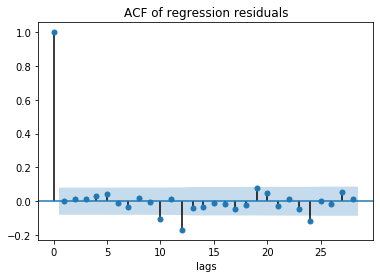

In [439]:
import statsmodels.graphics
from statsmodels.graphics.tsaplots import plot_acf

# Based on BIC choose lag order one
d = df[["diff_UN_US"]]
x = d.to_numpy()
x = np.transpose(x)
N = 600
x = x[:,:600]
l = (np.shape(x))[1]
#===================================
k = 5
X = np.zeros([k,l])
for i in range(k):
    X[i,:] =np.roll (x,-(i+1))
y = (x[:,1:l-k]).T
X = (X[:,1:l-k]).T
#===================================
β = ols(y,X)
e = err(y,X)
β_e = np.sqrt(β_err(y,X))
aicm = aic(y,X)
bicm = bic(y,X)
print(np.shape(X))
print(f"β estimate:{β.T}")
print(f"standard coeff errors:{β_e}")
print(f"AIC:{aicm}")
print(f"BIC:{bicm}")

fig, ax = plt.subplots()
plot_acf(e, ax = ax)
ax.set_title("ACF of regression residuals")
ax.set_xlabel("lags")
plt.savefig("acf.jpg")
#=========================================
# Ljung- Box test
def Q(err,h):
    n = (np.shape(err))[1]
    q = 0
    for k in range(h):
        q = ((ac(err,k))**2)/(n-k) + q
    q = n*(n+2)*q
    return q
  
α = 0.05
h = 10
Qs = Q(e.T,h) 


from scipy import stats
qch2 = stats.chi2.ppf(1-α,h)
print([Qs,qch2])
if Qs>qch2:
    print(f"there is ac for {h} lags and significance α = {α}")
else:
    print(f"no ac for {h} lags and significance α = {α}")

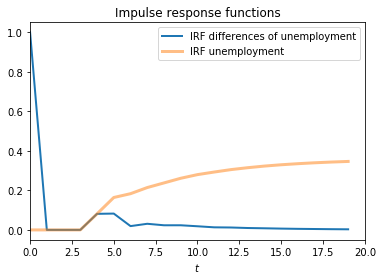

In [446]:
# Impulse response functions
d = df[["diff_UN_US"]]
x = d.to_numpy()
x = np.transpose(x)
N = 600
x = x[:,:600]
l = (np.shape(x))[1]
#===================================
k = 5
X = np.zeros([k,l])
for i in range(k):
    X[i,:] =np.roll (x,-(i+1))
y = (x[:,1:l-k]).T
X = (X[:,1:l-k]).T
#=================================
β = ols(y,X)
#=================================
L = 20
index = np.arange(0,L)
IRF = np.zeros(L)
IRFu = np.zeros(L)
IRF[0] = 1
#=================================
for i in range(k-1,L):
    IRF[i] = β[0]*IRF[i-1] + β[1]*IRF[i-2]+ β[2]*IRF[i-3] +β[3]*IRF[i-4]+β[4]*IRF[i-5]+ IRF[i]
    IRFu[i] = IRFu[i-1] + IRF[i]

    
fig, ax = plt.subplots()
ax.plot(index,IRF, label = "IRF differences of unemployment",lw=2)
ax.plot(index,IRFu, label = "IRF unemployment",alpha = 0.5,lw=3)
ax.legend()
ax.set_title("Impulse response functions")
ax.set_xlabel("$t$")
ax.set_xlim(0,L)
plt.savefig("IRFs.jpg")

In [413]:
# Augmented Dicky-Fuller test
# tested regression: u(t) = c + βu(t-1) + δ1Δu(t-1)+ δ2u(t-2) + δ3Δu(t-3)+...+ δpu(t-p)
u = df[["UN_US"]]
d = df[["diff_UN_US"]]
#===================================
u = u.to_numpy()
x = d.to_numpy()
x = np.transpose(x)
N = 600
u = (u.T)[:,:600]
x = x[:,:600]
l = (np.shape(x))[1]
#===================================
k = 10
X = np.ones([k+2,l])
for i in range(2,k+2):
    X[i,:] = np.roll(x,-(i+1))

X[1,:] = (np.roll(u,-1))
u = u
u = (u[:,1:l-k-2]).T
X = (X[:,1:l-k-2]).T

#====================================
e = err(u,X)
β = ols(u,X)
βdf = β[1]
βdferr = (β_err(u,X))[1]
t = βdf/βdferr # t test
#====================================
DF = (βdf-1)*np.sqrt((np.shape(X))[0])
α = 0.01
qdf = -3.434
print(βdf)
print(DF)
if DF < qdf:
    print(f"Unemployment does not have unit root, significance level α = {α}")
else:
    print(f"Unemployment does have unit root, significance level α = {α}")        

[0.98316507]
[-0.40787818]
Unemployment does have unit root, significance level α = 0.01


[4.9        4.8        4.9        4.6632708  4.56122683 4.50472507
 4.44599386 4.40648858 4.35671448 4.32565725 4.29879825 4.27611599
 4.25792665 4.24202912 4.22966785 4.21920588 4.21061302 4.20354554
 4.1976732  4.19287908 4.18889951 4.18562646 4.18292654 4.18069852
 4.17886411]
[[4.9 4.8 4.9 4.7 4.6 4.7 4.6 4.6 4.7 4.3 4.4 4.5 4.5 4.5 4.6 4.5 4.4 4.4
  4.3 4.4 4.2 4.3 4.2 4.3 4.3]]


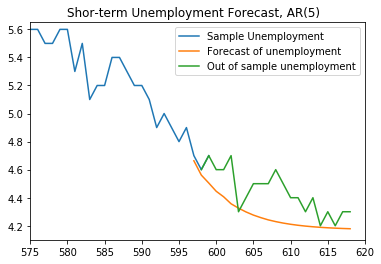

In [442]:
# forecasts
u = df[["UN_US"]]
d = df[["diff_UN_US"]]
#===================================
L = 20
u = u.to_numpy()
x = d.to_numpy()
x = np.transpose(x)
N = 600
ur = u.T[:,(600-6):(600-1+L)]
u = (u.T)[:,:600]
x = x[:,:600]
l = (np.shape(x))[1]
#===================================
k = 5
X = np.zeros([k,l])
for i in range(k):
    X[i,:] =np.roll (x,-(i+1))
y = (x[:,1:l-k]).T
X = (X[:,1:l-k]).T
#=================================
β = ols(y,X)
#=================================
ind = (np.shape(u))[1]
f = np.arange(ind-6,ind+L-1)
index = np.arange(0,ind)
IRF = np.zeros(5+L)
IRFu = np.zeros(5+L)
IRF[0:5] = x[:,ind-6:ind-1]
IRFu[0:5] = u[:,ind-6:ind-1]
#=================================
for i in range(k-2,L+5):
    IRF[i] =  β[0]*IRF[i-1] + β[1]*IRF[i-2]+ β[2]*IRF[i-3] +β[3]*IRF[i-4]+β[4]*IRF[i-5]+ IRF[i]
    IRFu[i] = IRF[i] + IRFu[i-1]
print(IRFu)
print(ur)  
fig, ax = plt.subplots()
ax.plot(index,u[0,:ind], label = "Sample Unemployment")
ax.plot(f[3:],IRFu[3:], label = "Forecast of unemployment")
ax.plot(f[4:],ur[0,4:], label = "Out of sample unemployment")
ax.legend()
ax.set_title("Shor-term Unemployment Forecast, AR(5)  ")
ax.set_xlim(575,ind+L)
ax.set_ylim(4.1,5.65)
plt.savefig("for.jpg")